In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.pandas.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv("../input/datamaestro2020/astro_train.csv")
test = pd.read_csv("../input/datamaestro2020/astro_test.csv")

In [3]:
X = train.drop("class", axis=1)
y = train["class"]

In [4]:
test.columns

Index(['id', 'dered_i', 'dered_z', 'dered_u', 'dered_g', 'dered_r', 'err_i',
       'err_z', 'err_u', 'err_g', 'err_r', 'extinction_r', 'skyVersion', 'run',
       'rerun', 'camCol', 'field', 'obj', 'photoz', '#ra', 'dec'],
      dtype='object')

In [ ]:
dummytest = test[num_attr + cat_attr]

In [ ]:
finaltest = full_pipeline.fit_transform(dummytest)

In [ ]:
pred = rfc.predict(finaltest)

In [5]:
X = X.drop(["id", "skyVersion", "run", "rerun", "camCol"], axis=1)

In [6]:
X.shape

(45000, 16)

In [7]:
X["err_g_log"] = np.log(X["err_g"])
X["err_i_log"] = np.log(X["err_i"])
X["err_r_cbrt"] = np.cbrt(X["err_r"])
X["err_u_log"] = np.log(X["err_u"])
X["err_z_log"] = np.log(X["err_z"])

In [8]:
dummy = pd.concat([X, y], axis=1)

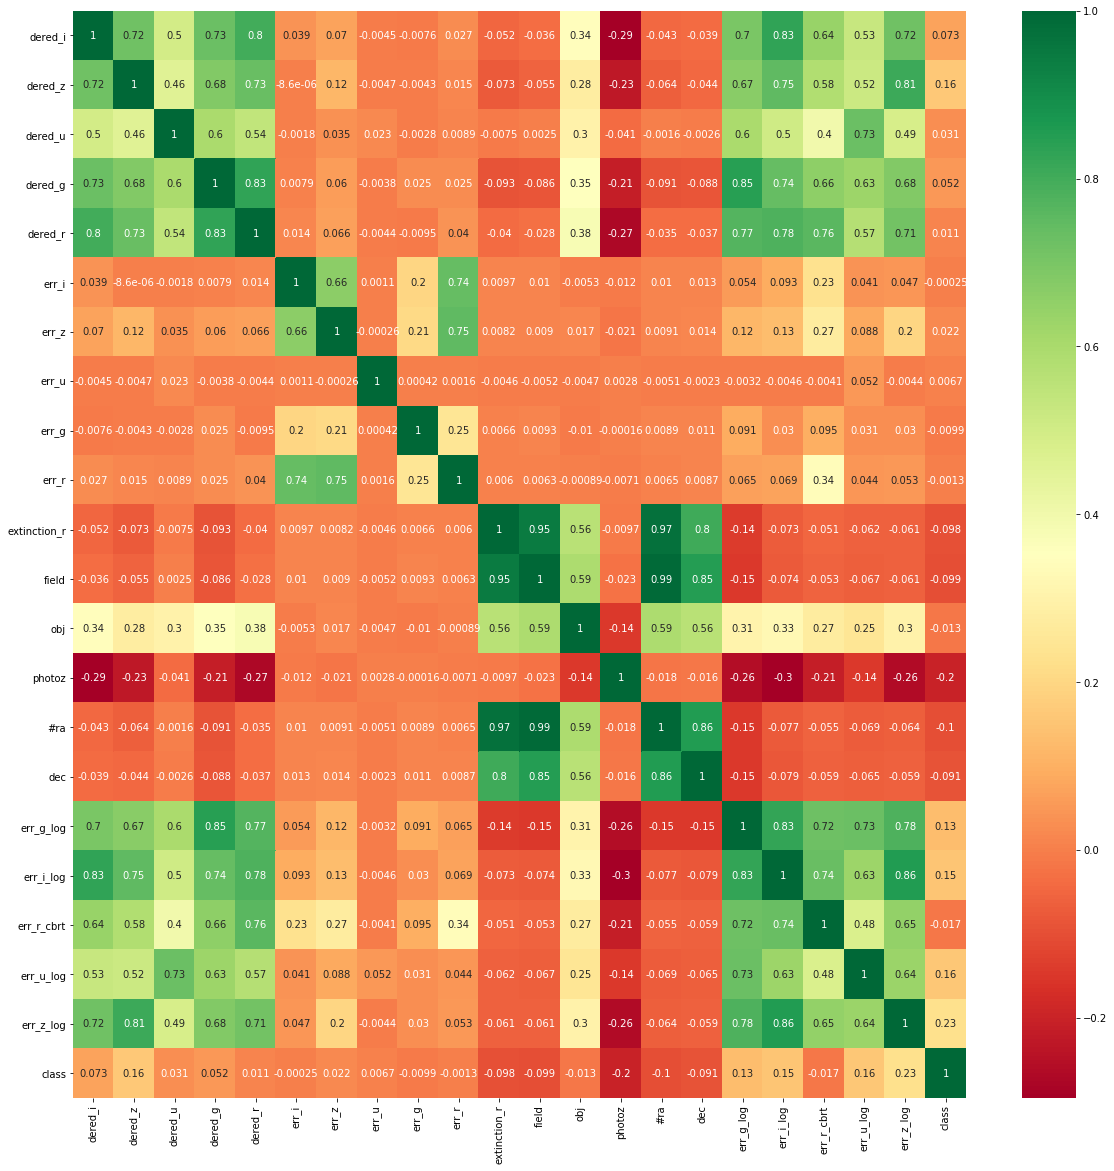

In [9]:
corrmat = dummy.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dummy[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
dummy["#ra_cat"] = pd.cut(dummy["#ra"],
                           bins=[0,180,220,np.inf],
                           labels=[1,2,3])
dummy["dec_cat"] = pd.cut(dummy["dec"],
                           bins=[-1.25,-1.0,-0.25,np.inf],
                           labels=[1,2,3])
dummy["extinction_r_cat"] = pd.cut(dummy["extinction_r"],
                           bins=[0,0.2,0.3,np.inf],
                           labels=[1,2,3])
dummy["field_cat"] = pd.cut(dummy["field"],
                           bins=[0,300,500,550,np.inf],
                           labels=[1,2,3,4])

In [11]:
dummy.columns

Index(['dered_i', 'dered_z', 'dered_u', 'dered_g', 'dered_r', 'err_i', 'err_z',
       'err_u', 'err_g', 'err_r', 'extinction_r', 'field', 'obj', 'photoz',
       '#ra', 'dec', 'err_g_log', 'err_i_log', 'err_r_cbrt', 'err_u_log',
       'err_z_log', 'class', '#ra_cat', 'dec_cat', 'extinction_r_cat',
       'field_cat'],
      dtype='object')

In [ ]:
corrmat = dummy.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dummy.corr(),annot=True,cmap="RdYlGn")

In [ ]:
dummy.head()

In [12]:
cat_attr = ['#ra_cat', 'dec_cat', 'extinction_r_cat',
       'field_cat']
cat_features = dummy[cat_attr]

In [14]:
from sklearn.feature_selection import SelectKBest, chi2

In [15]:
bestfeatures = SelectKBest(score_func=chi2, k=2)
fit = bestfeatures.fit(cat_features, y)

In [16]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(cat_features.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
featureScores

,Specs,Score
0,#ra_cat,239.964471
1,dec_cat,89.227752
2,extinction_r_cat,99.733377
3,field_cat,392.672545


In [17]:
num_attr = ['dered_i', 'dered_z', 'dered_u', 'dered_g', 'dered_r', 'err_i', 'err_z',
       'err_u', 'err_g', 'err_r', 'extinction_r', 'field', 'obj', 'photoz',
       '#ra', 'dec', 'err_g_log', 'err_i_log', 'err_r_cbrt', 'err_u_log',
       'err_z_log']
num_features = dummy[num_attr]

In [18]:
len(num_attr)

21

In [19]:
from sklearn.feature_selection import f_classif

In [21]:
bestfeatures = SelectKBest(score_func=f_classif, k=15)
fit = bestfeatures.fit(num_features, y)

In [22]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(num_features.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
featureScores

,Specs,Score
0,dered_i,2907.746584
1,dered_z,3935.011174
2,dered_u,71.148978
3,dered_g,1633.152166
4,dered_r,2084.134825
5,err_i,0.278407
6,err_z,50.746242
7,err_u,1.366360
8,err_g,2.302351
9,err_r,0.734858


In [23]:
print(featureScores.nlargest(12,'Score'))  #print 10 best features

           Specs        Score
20     err_z_log  4136.302884
1        dered_z  3935.011174
17     err_i_log  3480.846609
0        dered_i  2907.746584
13        photoz  2291.642788
4        dered_r  2084.134825
16     err_g_log  1801.140349
18    err_r_cbrt  1654.242392
3        dered_g  1633.152166
19     err_u_log   830.084647
14           #ra   281.716691
10  extinction_r   272.085861


In [28]:
attr = ['dered_i', 'dered_r', 'dered_z', 'dered_g',
       'extinction_r', 'photoz',
       '#ra', 'err_g_log', 'err_i_log', 'err_r_cbrt', 'err_u_log',
       'err_z_log']

In [29]:
len(attr)

12

In [30]:
trial = dummy[attr]

In [31]:
trial.shape

(45000, 12)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trial, y, test_size=0.2, stratify=y)

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfecv = RFECV(estimator=rfc, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
print('Best features :', X_train.columns[rfecv.support_])

In [ ]:
rfecv.grid_scores_

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
num_attr = ["err_z_log", "dered_z", "err_i_log", "dered_i", "photoz", "dered_r", "err_g_log", "err_r_cbrt", "dered_g", "err_u_log"]

In [ ]:
cat_attr = ['#ra_cat', 'dec_cat', 'extinction_r_cat',
       'field_cat']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('std_scaler', StandardScaler())])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
                ("num", num_pipeline, num_attr),
                ("cat", OneHotEncoder(drop='first'), cat_attr),
                ])

In [ ]:
from collections import Counter
print(Counter(y))

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res, y_res = nm.fit_sample(finalX, y)

In [ ]:
X_res.shape

In [ ]:
y_res.shape

In [ ]:
X_res = full_pipeline.fit_transform(X_res)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res)

In [ ]:
test["err_g_log"] = np.log(test["err_g"])
test["err_i_log"] = np.log(test["err_i"])
test["err_r_cbrt"] = np.cbrt(test["err_r"])
test["err_u_log"] = np.log(test["err_u"])
test["err_z_log"] = np.log(test["err_z"])
test["#ra_cat"] = pd.cut(test["#ra"],
                           bins=[0,180,220,np.inf],
                           labels=[1,2,3])
test["dec_cat"] = pd.cut(test["dec"],
                           bins=[-1.25,-1.0,-0.25,np.inf],
                           labels=[1,2,3])
test["extinction_r_cat"] = pd.cut(test["extinction_r"],
                           bins=[0,0.2,0.3,np.inf],
                           labels=[1,2,3])
test["field_cat"] = pd.cut(test["field"],
                           bins=[0,300,500,550,np.inf],
                           labels=[1,2,3,4])

In [ ]:
X_train.shape

In [ ]:
rfecv.grid_scores_
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
finalX = sc.fit_transform(finalX)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(finalX, y, test_size=0.2, stratify=y)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, X_train, y_train, cv=5, scoring='accuracy')
scores.mean()

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
scores = cross_val_score(xgb, X_train, y_train, cv=3, scoring="accuracy")
scores.mean()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

In [ ]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

In [ ]:
X_res, y_res = nm.fit_sample(X,y)

In [ ]:
X_res.shape

In [ ]:
dataset = pd.concat([X_res, test], axis=1)

In [ ]:
dataset.shape